IMPORTING PACKAGES AND DATA

In [1]:
import warnings
warnings.filterwarnings('ignore') 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score  # Import cross_val_score here

In [2]:
german = pd.read_csv('german_credit_data.csv')

In [3]:
german

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
german.shape

(1000, 11)

In [9]:
german = german.drop(['Unnamed: 0'], axis = 1)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
german

In [9]:
german['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [10]:
german['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [11]:
total_nas = german.isnull().sum().sort_values(ascending=False)
percent_missing = (german.isnull().sum()/german.isnull().count() * 100).sort_values(ascending=False)
missing = pd.concat([total_nas, percent_missing], axis=1, keys=['Total_Missing', 'Percentage(%)'])
missing

,Total_Missing,Percentage(%)
Checking account,394,39.4
Saving accounts,183,18.3
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0
Risk,0,0.0


In [12]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


UNIVARIATE ANALYSIS

In [10]:
# Set background and palette
sns.set(rc={"axes.facecolor": "#E0FFFF", "figure.facecolor": "#E0FFFF"})
custom_palette = ["#FF6347", "#32CD32", "#4169E1", "#FFD700", "#FF69B4", "#00FFFF"]
sns.set_palette(custom_palette)

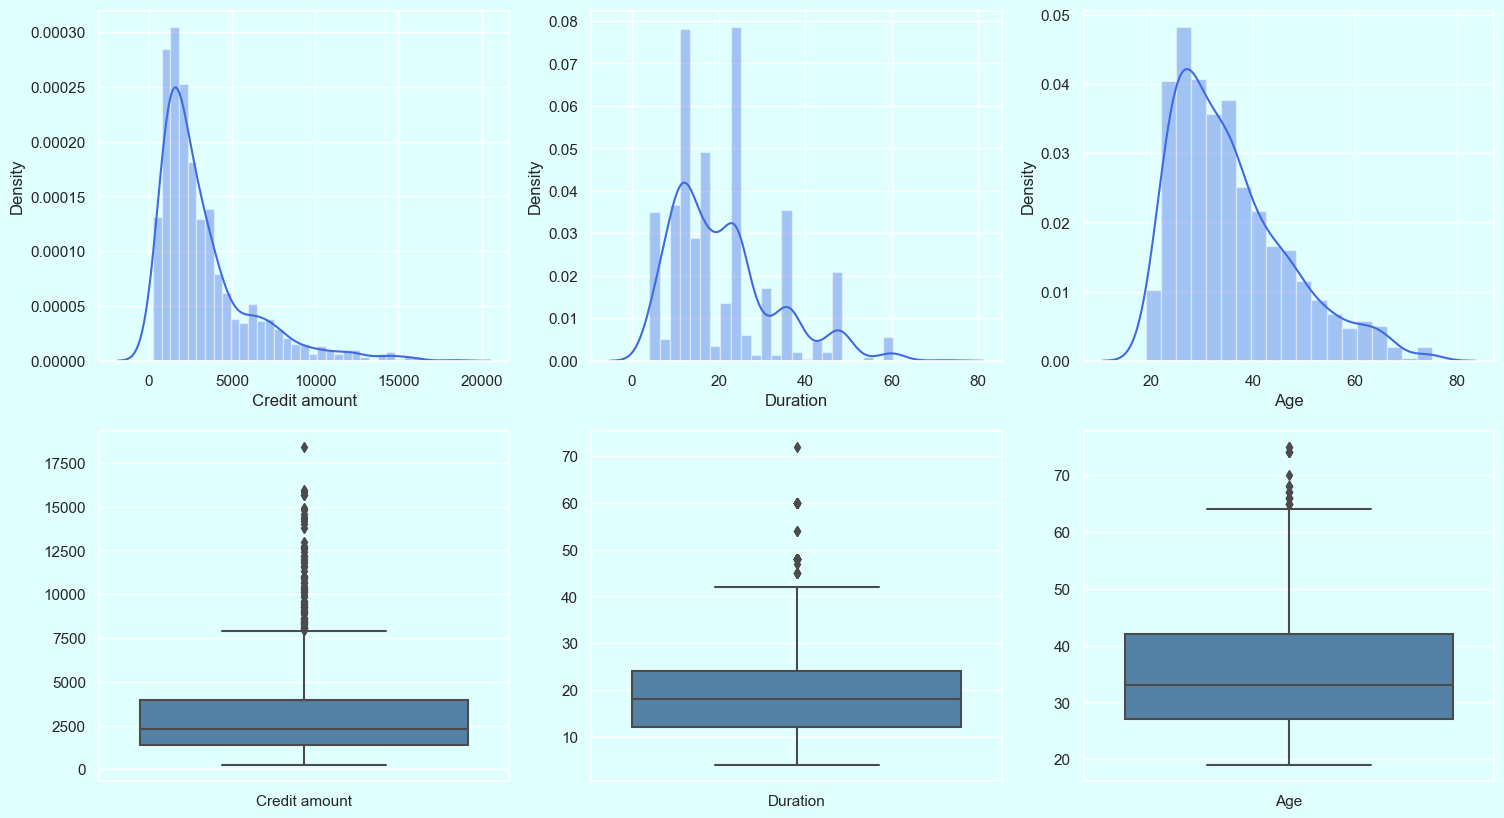

In [11]:
# Define the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot distplots for continuous variables
sns.distplot(german['Credit amount'], ax=axes[0, 0], color="#4169E1")
sns.distplot(german['Duration'], ax=axes[0, 1], color="#4169E1")
sns.distplot(german['Age'], ax=axes[0, 2], color="#4169E1")

# Plot boxplots for continuous variables to visualize outliers
sns.boxplot(data=german[['Credit amount']], ax=axes[1, 0], color="#4682B4")
sns.boxplot(data=german[['Duration']], ax=axes[1, 1], color="#4682B4")
sns.boxplot(data=german[['Age']], ax=axes[1, 2], color="#4682B4")

plt.show()

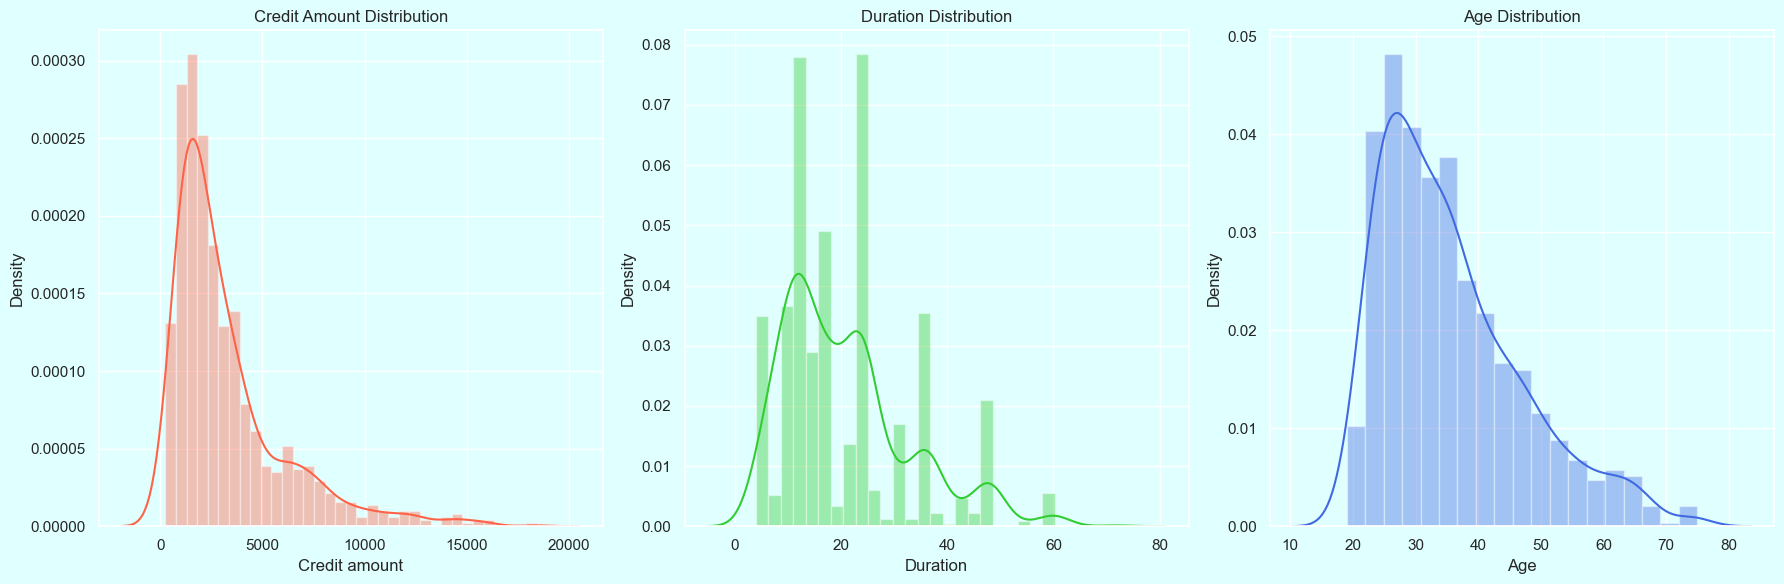

In [219]:
# Define the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot distplots for continuous variables
sns.distplot(german['Credit amount'], ax=axes[0], color="#FF6347")
sns.distplot(german['Duration'], ax=axes[1], color="#32CD32")
sns.distplot(german['Age'], ax=axes[2], color="#4169E1")

# Set titles
axes[0].set_title('Credit Amount Distribution')
axes[1].set_title('Duration Distribution')
axes[2].set_title('Age Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

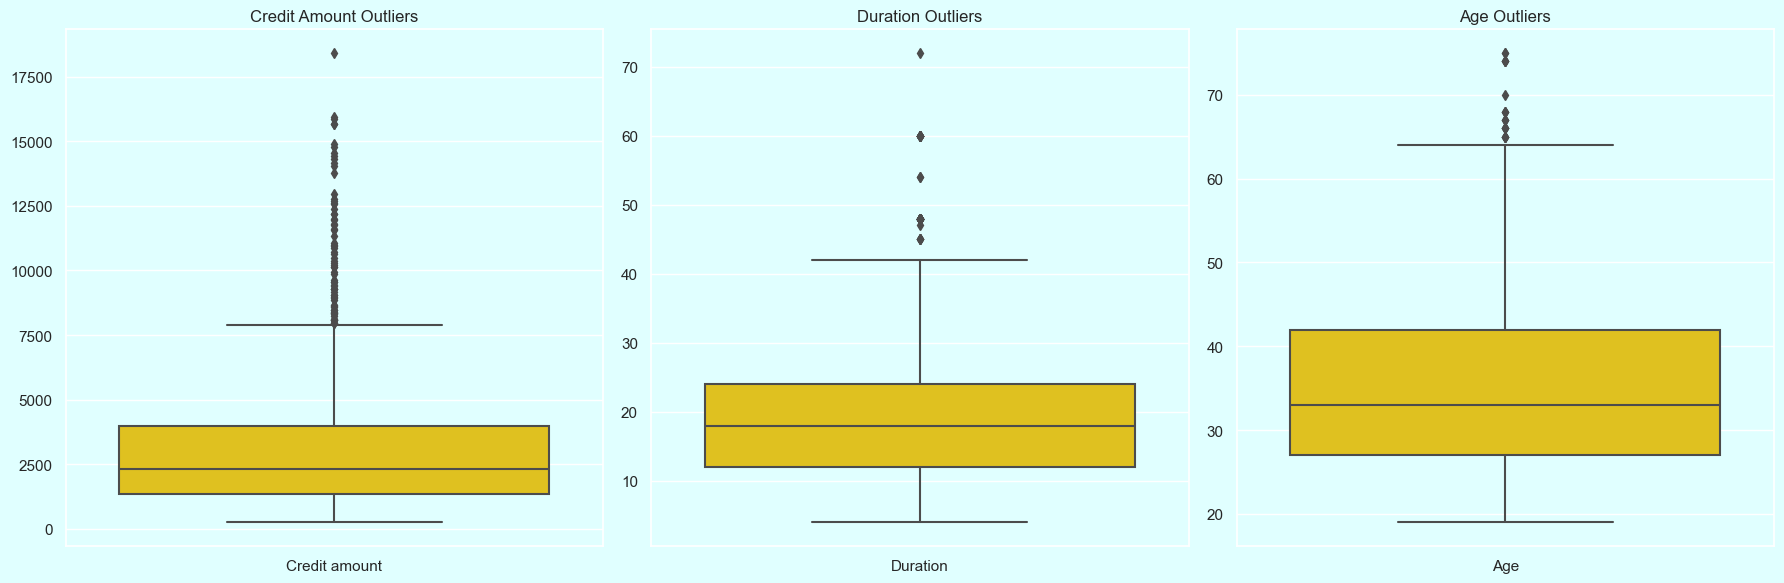

In [220]:
# Define the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot boxplots for continuous variables to visualize outliers
sns.boxplot(data=german[['Credit amount']], ax=axes[0], color="#FFD700")
sns.boxplot(data=german[['Duration']], ax=axes[1], color="#FFD700")
sns.boxplot(data=german[['Age']], ax=axes[2], color="#FFD700")

# Set titles
axes[0].set_title('Credit Amount Outliers')
axes[1].set_title('Duration Outliers')
axes[2].set_title('Age Outliers')

plt.tight_layout()
plt.show()

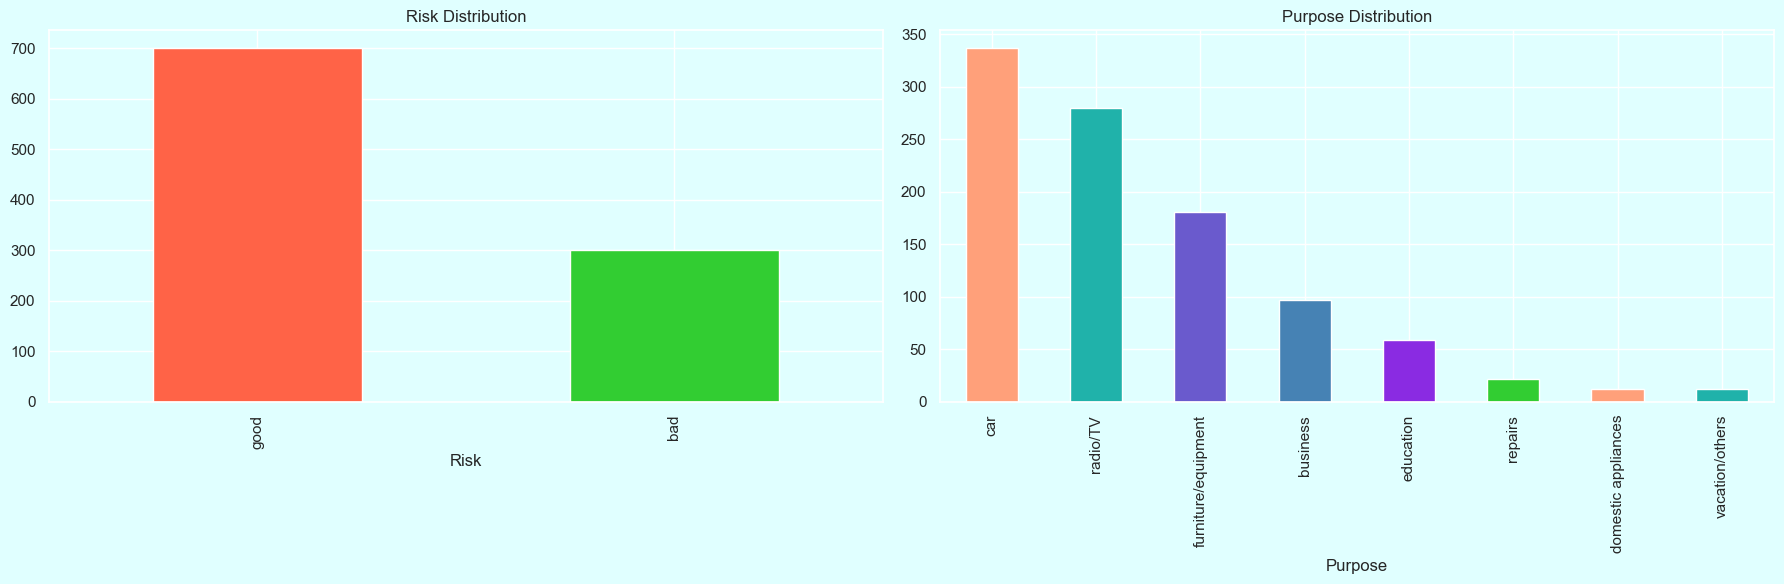

In [18]:
# Define a new custom palette
custom_palette_2 = ["#FFA07A", "#20B2AA", "#6A5ACD", "#4682B4", "#8A2BE2", "#32CD32"]


# Define the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot bar plots for categorical variables
german['Risk'].value_counts().plot(kind='bar', ax=axes[0], color=custom_palette)
german['Purpose'].value_counts().plot(kind='bar', ax=axes[1], color=custom_palette_2)


# Set titles
axes[0].set_title('Risk Distribution')
axes[1].set_title('Purpose Distribution')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

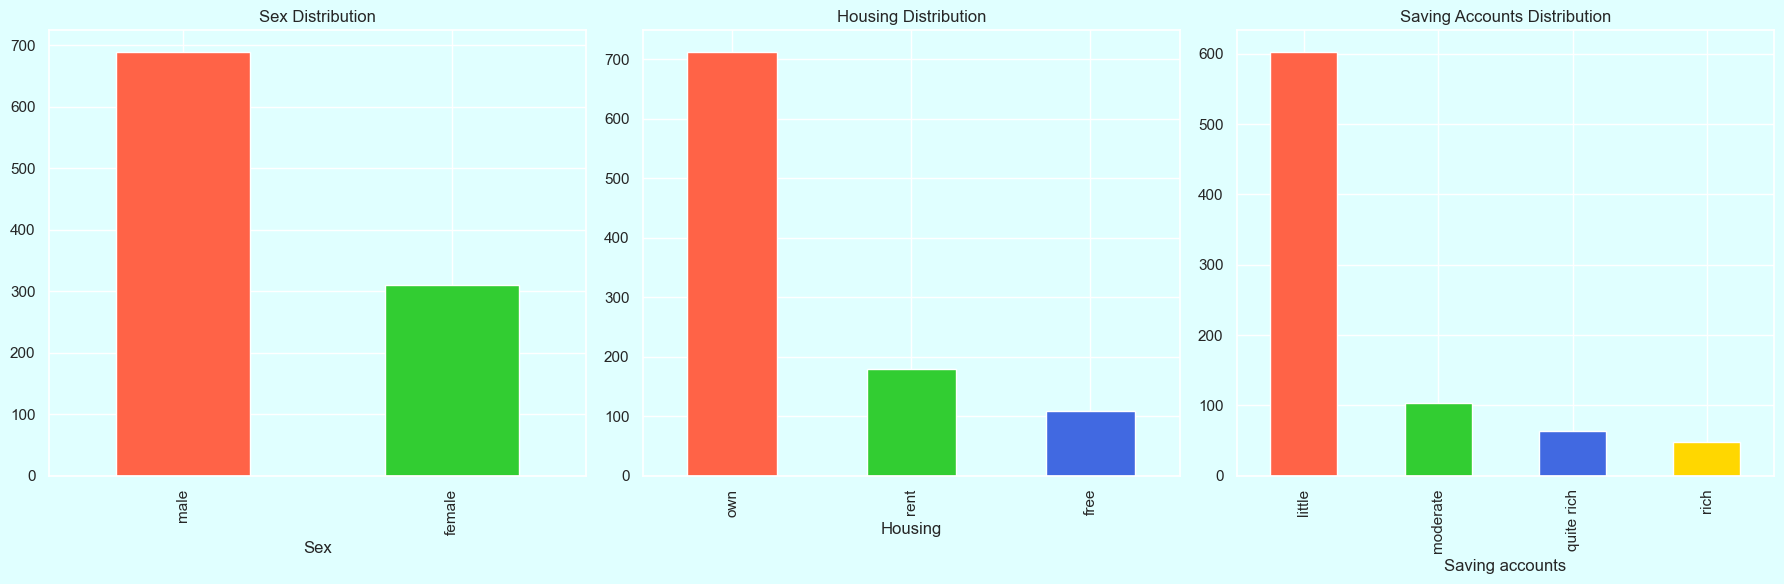

In [19]:

# Define the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot bar plots for categorical variables
german['Sex'].value_counts().plot(kind='bar', ax=axes[0], color=custom_palette)
german['Housing'].value_counts().plot(kind='bar', ax=axes[1], color=custom_palette)
german['Saving accounts'].value_counts().plot(kind='bar', ax=axes[2], color=custom_palette)

# Set titles
axes[0].set_title('Sex Distribution')
axes[1].set_title('Housing Distribution')
axes[2].set_title('Saving Accounts Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
german.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [73]:
german['Purpose'].nunique()

8

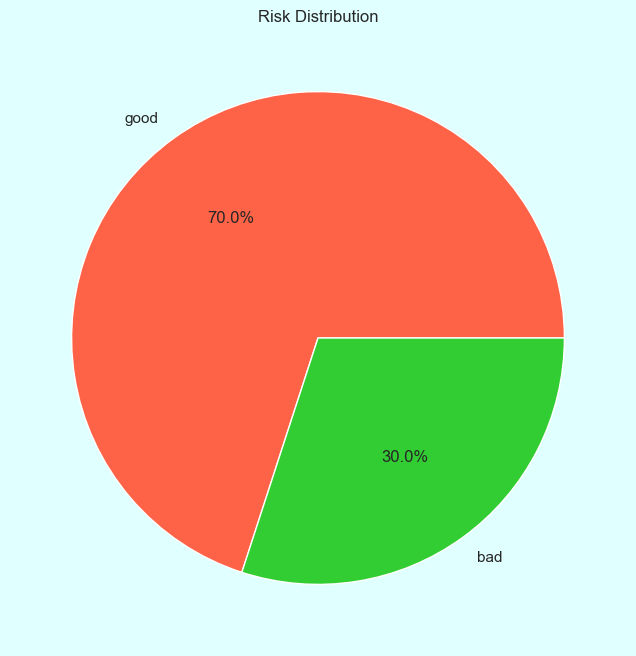

In [22]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'german'

# Calculate value counts for 'Risk'
risk_counts = german['Risk'].value_counts()

# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', colors=['#FF6347', '#32CD32'])

# Add title
plt.title('Risk Distribution')

# Show the plot
plt.show()


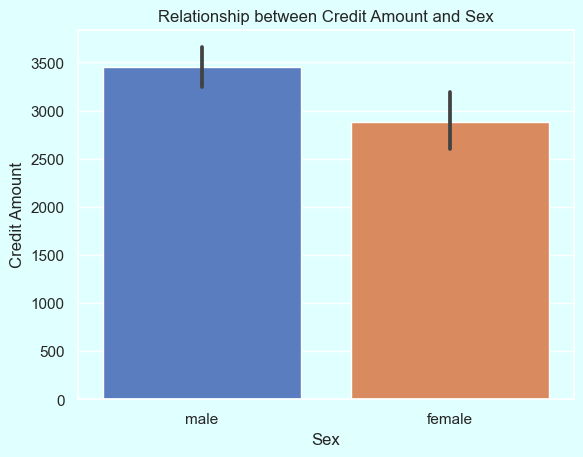

In [26]:

# Create strip plot for 'Credit amount' and 'Sex'
sns.barplot(x='Sex', y='Credit amount', data=german, palette='muted')

# Set title and labels
plt.title('Relationship between Credit Amount and Sex')
plt.xlabel('Sex')
plt.ylabel('Credit Amount')

# Show the plot
plt.show()

In [256]:
german.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [28]:
german['Age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [12]:
import pandas as pd

# Define the bins for grouping
bins = [0, 3000, 7000, float('inf')]  # Small, Mid, Large

# Define the labels for the bins
labels = ['Small', 'Mid', 'Large']

# Create a new column 'Credit size' based on the grouping
german['Credit size'] = pd.cut(german['Credit amount'], bins=bins, labels=labels)

# Display the unique values in the new 'Credit size' column
print(german['Credit size'].unique())


['Small', 'Mid', 'Large']
Categories (3, object): ['Small' < 'Mid' < 'Large']


In [13]:
german.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit size
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Small
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Mid
2,49,male,1,own,little,NaN,2096,12,education,good,Small
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Large
4,53,male,2,free,little,little,4870,24,car,bad,Mid


In [14]:
import pandas as pd

# Define the bins for grouping
bins = [0, 18, 36, float('inf')]  # Short, Medium, Long

# Define the labels for the bins
labels = ['Short', 'Medium', 'Long']

# Create a new column 'Duration size' based on the grouping
german['Duration size'] = pd.cut(german['Duration'], bins=bins, labels=labels)

# Display the unique values in the new 'Duration size' column
print(german['Duration size'].unique())


['Short', 'Long', 'Medium']
Categories (3, object): ['Short' < 'Medium' < 'Long']


In [15]:
german.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit size,Duration size
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Small,Short
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Mid,Long
2,49,male,1,own,little,NaN,2096,12,education,good,Small,Short
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Large,Long
4,53,male,2,free,little,little,4870,24,car,bad,Mid,Medium


In [16]:
import pandas as pd

# Define the bins for grouping
bins = [0, 30, 50, float('inf')]  # Young, Middle-aged, Elderly

# Define the labels for the bins
labels = ['Young', 'Middle-aged', 'Elderly']

# Create a new column 'Age group' based on the grouping
german['Age group'] = pd.cut(german['Age'], bins=bins, labels=labels)

# Display the unique values in the new 'Age group' column
print(german['Age group'].unique())


['Elderly', 'Young', 'Middle-aged']
Categories (3, object): ['Young' < 'Middle-aged' < 'Elderly']


In [17]:
german.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit size,Duration size,Age group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Small,Short,Elderly
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Mid,Long,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Small,Short,Middle-aged
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Large,Long,Middle-aged
4,53,male,2,free,little,little,4870,24,car,bad,Mid,Medium,Elderly


In [18]:
# Drop the specified columns
german.drop(columns=['Credit amount', 'Age', 'Duration'], inplace=True)

# Display the first few rows of the DataFrame to verify changes
print(german.head())


      Sex  Job Housing Saving accounts Checking account              Purpose  \
0    male    2     own             NaN           little             radio/TV   
1  female    2     own          little         moderate             radio/TV   
2    male    1     own          little              NaN            education   
3    male    2    free          little           little  furniture/equipment   
4    male    2    free          little           little                  car   

   Risk Credit size Duration size    Age group  
0  good       Small         Short      Elderly  
1   bad         Mid          Long        Young  
2  good       Small         Short  Middle-aged  
3  good       Large          Long  Middle-aged  
4   bad         Mid        Medium      Elderly  


In [20]:
german.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk,Credit size,Duration size,Age group
0,male,2,own,NaN,little,radio/TV,good,Small,Short,Elderly
1,female,2,own,little,moderate,radio/TV,bad,Mid,Long,Young
2,male,1,own,little,NaN,education,good,Small,Short,Middle-aged
3,male,2,free,little,little,furniture/equipment,good,Large,Long,Middle-aged
4,male,2,free,little,little,car,bad,Mid,Medium,Elderly


In [38]:
# Specify the file path where you want to save the CSV file
file_path = 'german_modified.csv'

# Save the DataFrame to a CSV file
german.to_csv(file_path, index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [19]:
german.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk,Credit size,Duration size,Age group
0,male,2,own,NaN,little,radio/TV,good,Small,Short,Elderly
1,female,2,own,little,moderate,radio/TV,bad,Mid,Long,Young
2,male,1,own,little,NaN,education,good,Small,Short,Middle-aged
3,male,2,free,little,little,furniture/equipment,good,Large,Long,Middle-aged
4,male,2,free,little,little,car,bad,Mid,Medium,Elderly


EDA

In [41]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Sex               1000 non-null   object  
 1   Job               1000 non-null   int64   
 2   Housing           1000 non-null   object  
 3   Saving accounts   817 non-null    object  
 4   Checking account  606 non-null    object  
 5   Purpose           1000 non-null   object  
 6   Risk              1000 non-null   object  
 7   Credit size       1000 non-null   category
 8   Duration size     1000 non-null   category
 9   Age group         1000 non-null   category
dtypes: category(3), int64(1), object(6)
memory usage: 58.1+ KB


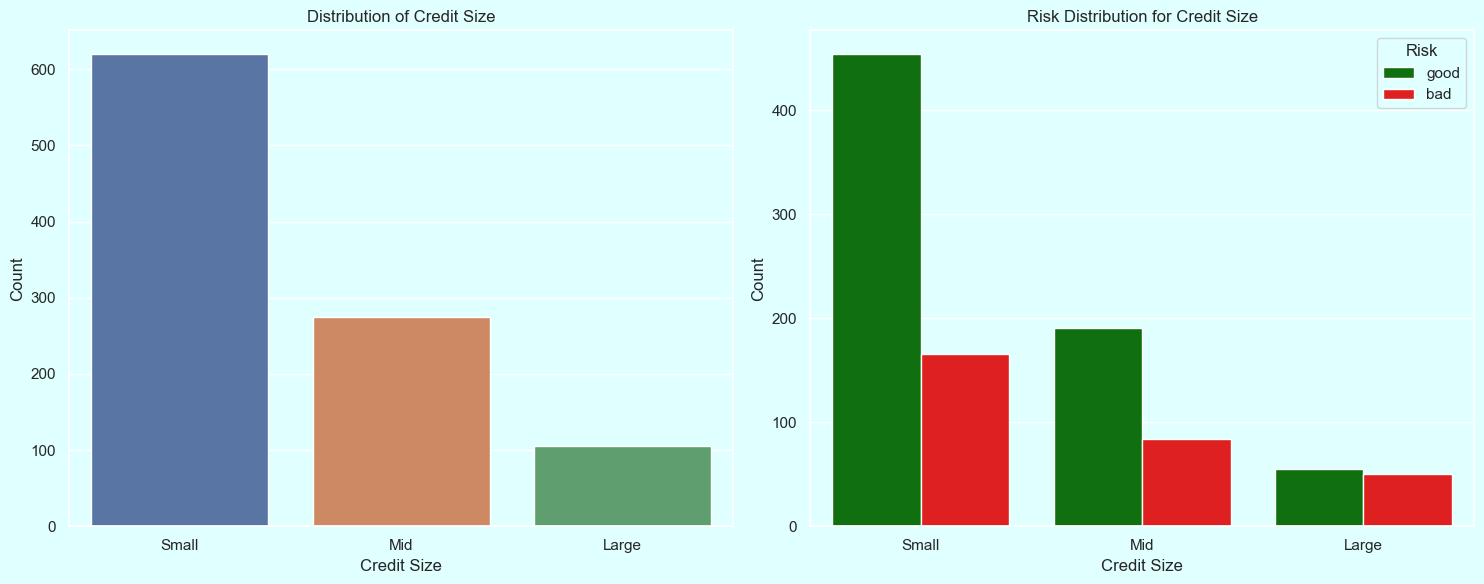

In [44]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot countplot for 'Credit size'
sns.countplot(x='Credit size', data=german, ax=axes[0])
axes[0].set_title('Distribution of Credit Size')
axes[0].set_xlabel('Credit Size')
axes[0].set_ylabel('Count')

# Plot joint barplot for 'Credit size' and 'Risk'
sns.countplot(x='Credit size', hue='Risk', data=german, ax=axes[1], palette={'good': 'green', 'bad': 'red'})
axes[1].set_title('Risk Distribution for Credit Size')
axes[1].set_xlabel('Credit Size')
axes[1].set_ylabel('Count')
axes[1].legend(title='Risk')

plt.tight_layout()
plt.show()


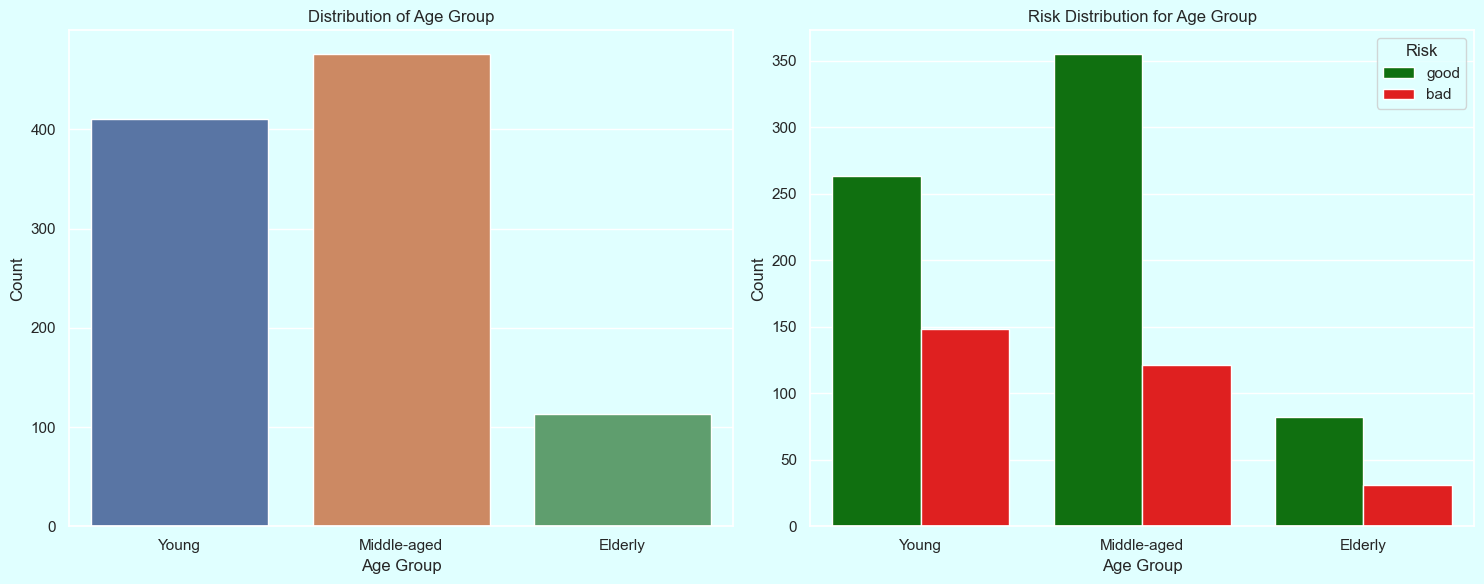

In [45]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot countplot for 'Age group'
sns.countplot(x='Age group', data=german, ax=axes[0])
axes[0].set_title('Distribution of Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Plot joint barplot for 'Age group' and 'Risk'
sns.countplot(x='Age group', hue='Risk', data=german, ax=axes[1], palette={'good': 'green', 'bad': 'red'})
axes[1].set_title('Risk Distribution for Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Risk')

plt.tight_layout()
plt.show()


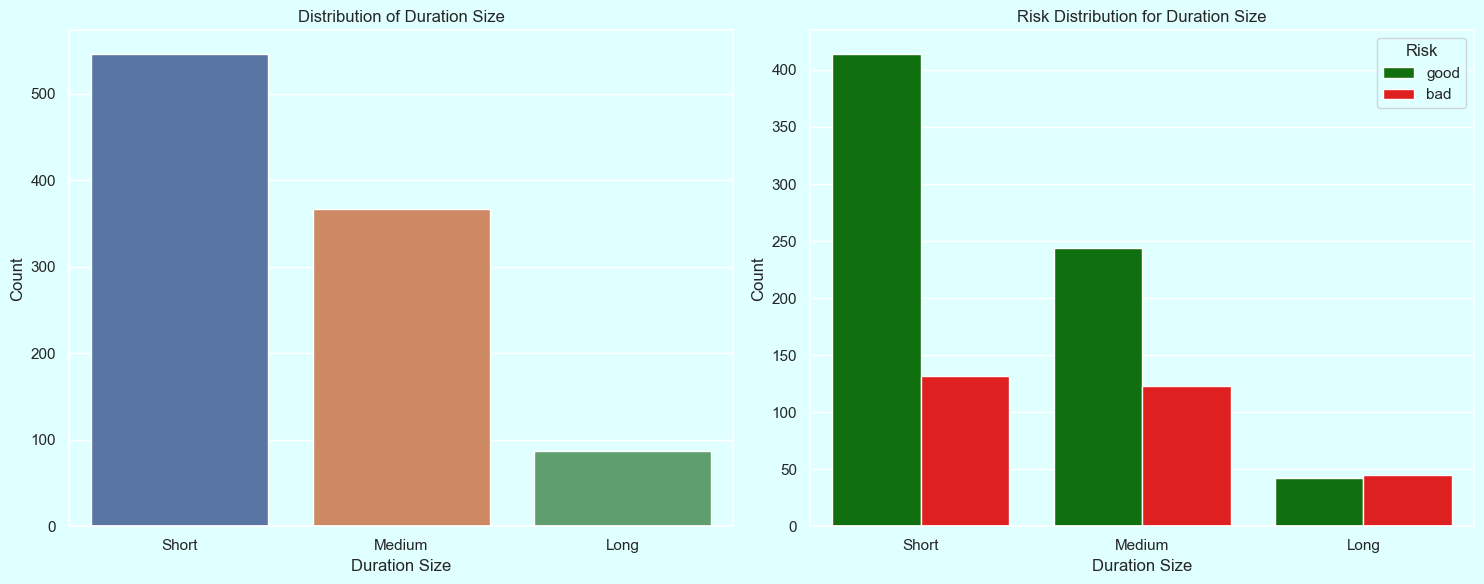

In [46]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot countplot for 'Duration size'
sns.countplot(x='Duration size', data=german, ax=axes[0])
axes[0].set_title('Distribution of Duration Size')
axes[0].set_xlabel('Duration Size')
axes[0].set_ylabel('Count')

# Plot joint barplot for 'Duration size' and 'Risk'
sns.countplot(x='Duration size', hue='Risk', data=german, ax=axes[1], palette={'good': 'green', 'bad': 'red'})
axes[1].set_title('Risk Distribution for Duration Size')
axes[1].set_xlabel('Duration Size')
axes[1].set_ylabel('Count')
axes[1].legend(title='Risk')

plt.tight_layout()
plt.show()


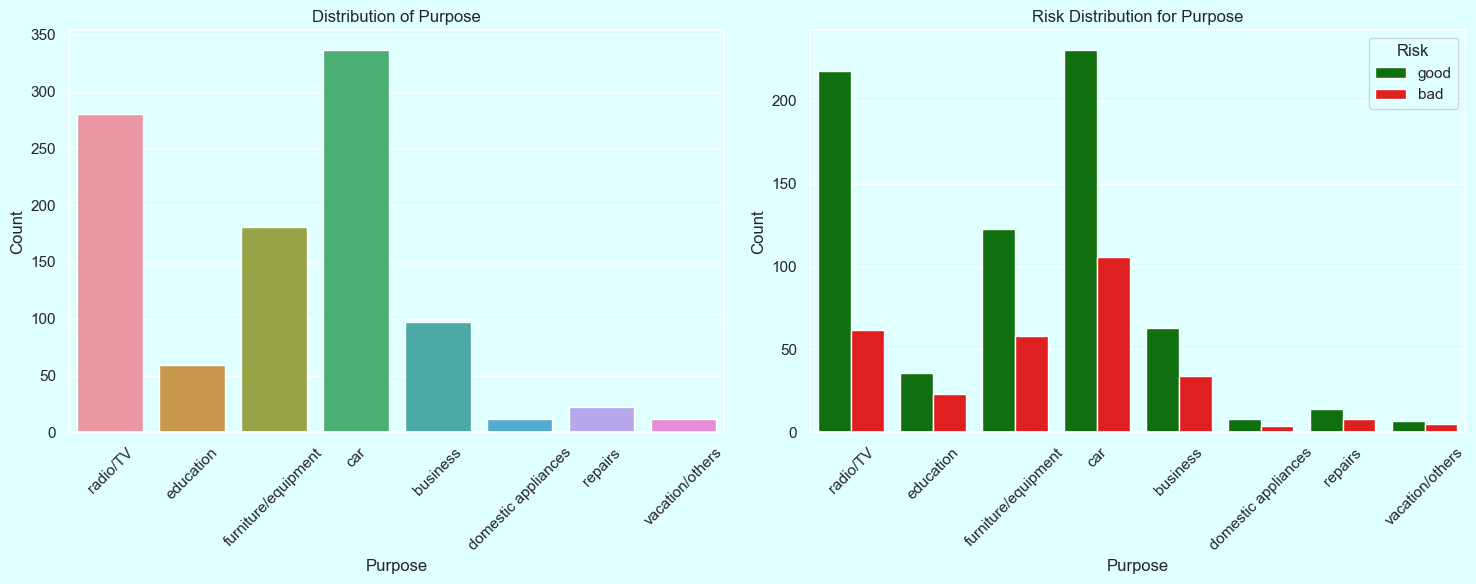

In [141]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot countplot for 'Purpose'
sns.countplot(x='Purpose', data=german, ax=axes[0])
axes[0].set_title('Distribution of Purpose')
axes[0].set_xlabel('Purpose')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot joint barplot for 'Purpose' and 'Risk'
sns.countplot(x='Purpose', hue='Risk', data=german, ax=axes[1], palette={'good': 'green', 'bad': 'red'})
axes[1].set_title('Risk Distribution for Purpose')
axes[1].set_xlabel('Purpose')
axes[1].set_ylabel('Count')
axes[1].legend(title='Risk')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


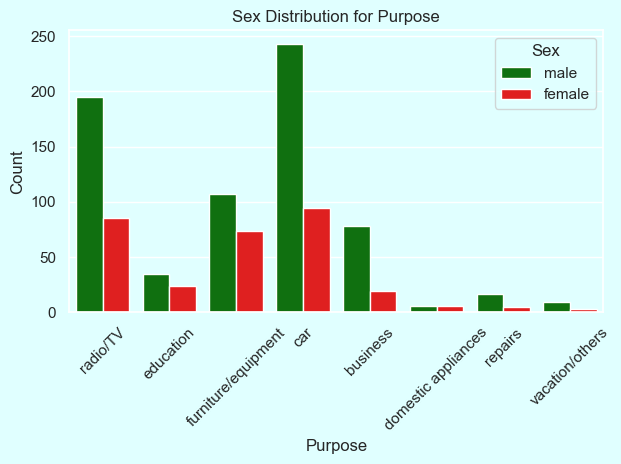

In [171]:
# Plot joint barplot for 'Purpose' and 'Risk'
sns.countplot(x='Purpose', hue='Sex', data=german, palette={'male': 'green', 'female': 'red'})
plt.title('Sex Distribution for Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

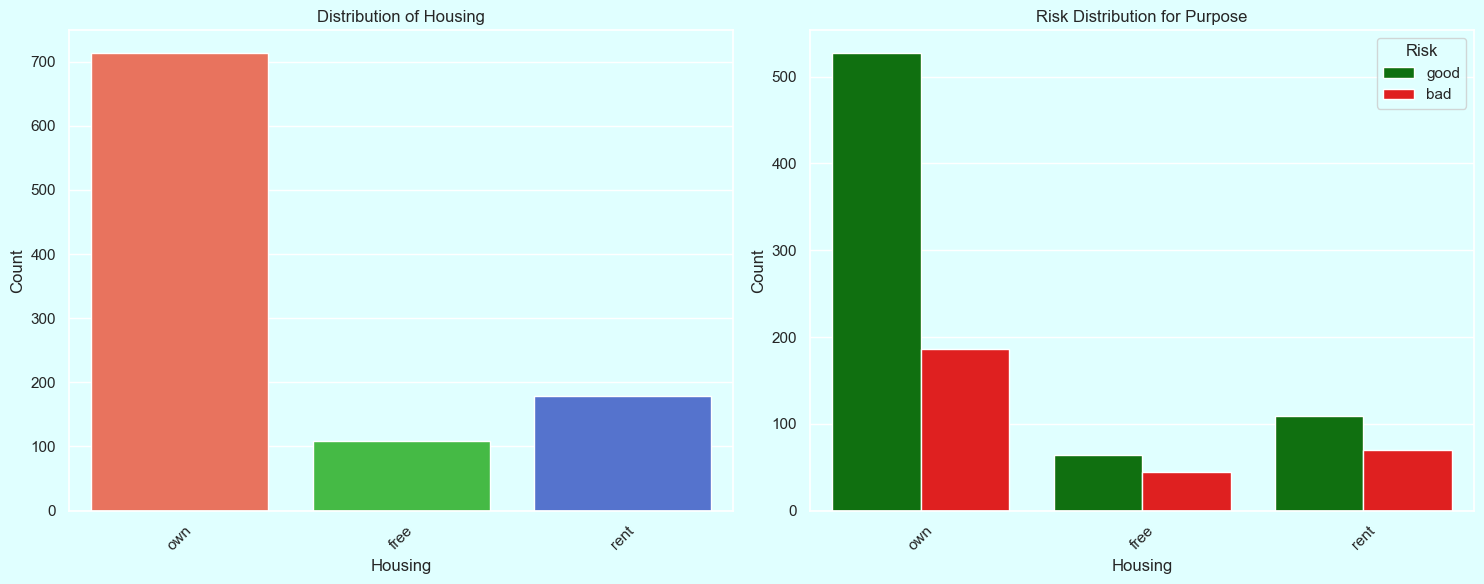

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot countplot for 'Purpose'
sns.countplot(x='Housing', data=german, ax=axes[0])
axes[0].set_title('Distribution of Housing')
axes[0].set_xlabel('Housing')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot joint barplot for 'Purpose' and 'Risk'
sns.countplot(x='Housing', hue='Risk', data=german, ax=axes[1], palette={'good': 'green', 'bad': 'red'})
axes[1].set_title('Risk Distribution for Purpose')
axes[1].set_xlabel('Housing')
axes[1].set_ylabel('Count')
axes[1].legend(title='Risk')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [64]:
german['Job'] = german['Job'].astype('category')


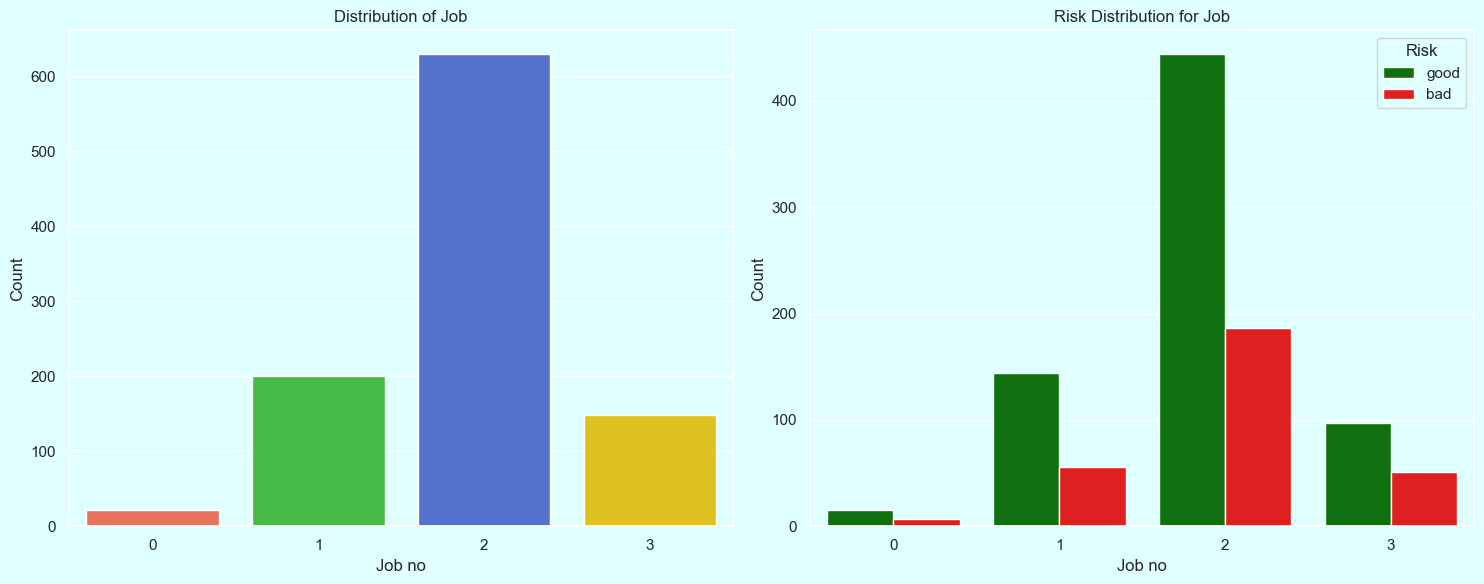

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot countplot for 'Purpose'
sns.countplot(x='Job', data=german, ax=axes[0])
axes[0].set_title('Distribution of Job')
axes[0].set_xlabel('Job no')
axes[0].set_ylabel('Count')
#axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot joint barplot for 'Purpose' and 'Risk'
sns.countplot(x='Job', hue='Risk', data=german, ax=axes[1], palette={'good': 'green', 'bad': 'red'})
axes[1].set_title('Risk Distribution for Job')
axes[1].set_xlabel('Job no')
axes[1].set_ylabel('Count')
axes[1].legend(title='Risk')
#axes[1].tick_params(axis='x', rota)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Data Preprocessing

In [21]:
german['Risk'].replace({'good': 1, 'bad': 0}, inplace=True)


In [25]:
german.head()

,Sex,Job,Housing,Purpose,Risk,Credit size,Duration size,Age group
0,male,2,own,radio/TV,1,Small,Short,Elderly
1,female,2,own,radio/TV,0,Mid,Long,Young
2,male,1,own,education,1,Small,Short,Middle-aged
3,male,2,free,furniture/equipment,1,Large,Long,Middle-aged
4,male,2,free,car,0,Mid,Medium,Elderly


In [23]:
german = german.drop(['Saving accounts'], axis = 1)

In [24]:
german = german.drop(['Checking account'], axis = 1)


In [28]:
X = german.drop(['Risk'], axis=1)
Y = german['Risk']

In [29]:
ohe_cols = ['Sex', 'Housing', 'Purpose', 'Credit size', 'Duration size', 'Age group']


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)


print(x_train.shape,x_test.shape)

(800, 7) (200, 7)


In [31]:
x_train.columns

Index(['Sex', 'Job', 'Housing', 'Purpose', 'Credit size', 'Duration size',
       'Age group'],
      dtype='object')

In [32]:
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)


In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_cols])


OneHotEncoder()

In [34]:
ohe_cols

['Sex', 'Housing', 'Purpose', 'Credit size', 'Duration size', 'Age group']

In [35]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['free', 'own', 'rent'], dtype=object),
 array(['business', 'car', 'domestic appliances', 'education',
        'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others'],
       dtype=object),
 array(['Large', 'Mid', 'Small'], dtype=object),
 array(['Long', 'Medium', 'Short'], dtype=object),
 array(['Elderly', 'Middle-aged', 'Young'], dtype=object)]

In [36]:
#we concatenate each of the ohe categories into one df
merge_ohe_cols=np.concatenate((ohe.categories_[0], 
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5]))
              

In [37]:
merge_ohe_cols

array(['female', 'male', 'free', 'own', 'rent', 'business', 'car',
       'domestic appliances', 'education', 'furniture/equipment',
       'radio/TV', 'repairs', 'vacation/others', 'Large', 'Mid', 'Small',
       'Long', 'Medium', 'Short', 'Elderly', 'Middle-aged', 'Young'],
      dtype=object)

In [38]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_cols]).toarray(), columns=merge_ohe_cols)
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_cols]).toarray(),columns=merge_ohe_cols)

In [39]:
ohe_data.columns

Index(['female', 'male', 'free', 'own', 'rent', 'business', 'car',
       'domestic appliances', 'education', 'furniture/equipment', 'radio/TV',
       'repairs', 'vacation/others', 'Large', 'Mid', 'Small', 'Long', 'Medium',
       'Short', 'Elderly', 'Middle-aged', 'Young'],
      dtype='object')

In [40]:
X_new = pd.concat([ohe_data, x_train], axis=1)
X_new = X_new.drop(ohe_cols, axis=1)


X_new_test = pd.concat([ohe_data2, x_test], axis=1)
X_new_test = X_new_test.drop(ohe_cols, axis=1)

In [41]:
X_new.head()

,female,male,free,own,rent,business,car,domestic appliances,education,furniture/equipment,...,Mid,Small,Long,Medium,Short,Elderly,Middle-aged,Young,index,Job
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,56,3
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,955,3
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,231,1
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,738,3
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,740,2


In [281]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the numerical columns
scale_cols = ['Job', 'Age', 'Credit amount', 'Duration'] 

# Initialize the scaler (you can choose either StandardScaler or MinMaxScaler)
scaler = StandardScaler()  # or scaler = MinMaxScaler()


X_new.loc[:,scale_cols] = scaler.fit_transform(X_new.loc[:,scale_cols])
X_new_test.loc[:,scale_cols] = scaler.transform(X_new_test.loc[:,scale_cols])


In [42]:
X_new_test.head()

,female,male,free,own,rent,business,car,domestic appliances,education,furniture/equipment,...,Mid,Small,Long,Medium,Short,Elderly,Middle-aged,Young,index,Job
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,518,2
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,871,2
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,797,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,274,1
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,325,1


In [283]:
X_new

,female,male,free,own,rent,business,car,domestic appliances,education,furniture/equipment,...,Medium,Short,Elderly,Middle-aged,Young,index,Age,Job,Credit amount,Duration
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,56,1.392338,1.687092,1.184247,-0.726618
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,955,1.823904,1.687092,-0.712726,0.284182
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,231,1.306025,-1.342478,-0.250527,-0.979319
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,738,0.788147,1.687092,1.290379,-1.232019
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,740,-0.333924,0.172307,-0.316452,0.284182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,241,1.306025,0.172307,-0.580876,-1.232019
796,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,253,-0.074985,0.172307,0.344971,0.284182
797,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,390,-0.506550,1.687092,-0.499375,-0.221218
798,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,667,-0.765489,0.172307,0.148645,2.305784


In [45]:
X_new_test

,female,male,free,own,rent,business,car,domestic appliances,education,furniture/equipment,...,Large,Mid,Small,Long,Medium,Short,Elderly,Middle-aged,Young,Job
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
196,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2
197,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2
198,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2


In [43]:
X_new_test = X_new_test.drop(['index'], axis = 1)

In [44]:
X_new = X_new.drop(['index'], axis = 1)

In [295]:
X_new = X_new.drop(['Age', 'Credit amount', 'Duration'], axis = 1)

In [297]:
X_new_test = X_new_test.drop(['Age', 'Credit amount', 'Duration'], axis = 1)

In [298]:
X_new

,female,male,free,own,rent,business,car,domestic appliances,education,furniture/equipment,...,Large,Mid,Small,Long,Medium,Short,Elderly,Middle-aged,Young,Job
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.687092
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.687092
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.342478
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.687092
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.172307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.172307
796,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.172307
797,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.687092
798,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.172307


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
#from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold, cross_val_score
from lightgbm import LGBMClassifier


ML CLASSIFICATION

In [47]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0) 
lgb = lgb.LGBMClassifier() 

In [48]:
clf = {
    #'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [49]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    return accuracy, precision, recall, specificity

In [50]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [51]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():
    
    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)
    

For  xgb
Accuracy -  0.615
Precision -  0.6586826347305389
Recall -  0.8461538461538461
Specificity -  0.18571428571428572

For  cat
Accuracy -  0.635
Precision -  0.6647398843930635
Recall -  0.8846153846153846
Specificity -  0.17142857142857143

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 570, number of negative: 230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.712500 -> initscore=0.907557
[LightGBM] [Info] Start training from score 0.907557
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

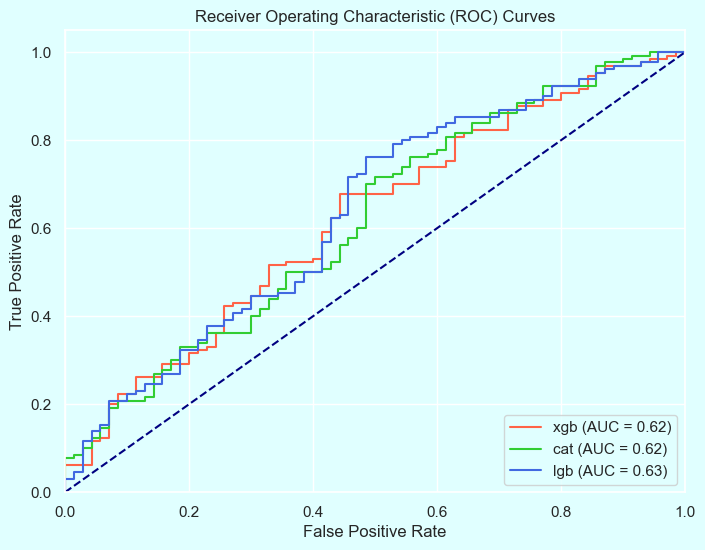

In [126]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the classifiers and their names
clf = {
    #'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

# Plot ROC curves for each classifier
plt.figure(figsize=(8, 6))
for name, clf in clf.items():
    y_pred_proba = clf.predict_proba(X_new_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [127]:
from sklearn.metrics import confusion_matrix

# Define the classifiers and their names
clf = {
    #'KN' : knc, 
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}
# Calculate confusion matrix for each model
for name, clf in clf.items():
    y_pred = clf.predict(X_new_test)
    cm = confusion_matrix(y_test, y_pred)
    

    # Extract TN, FP, FN, TP from confusion matrix
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate False Positive Rate (FPR)
    fpr = fp / (fp + tn)
    
    # Calculate False Negative Rate (FNR)
    fnr = fn / (fn + tp)
    2
    TPR = tp / (tp + fn)
    
    print(f"For {name}:")
    print(f"False Positive Rate (FPR): {fpr}")
    print(f"False Negative Rate (FNR): {fnr}")
    print(f"True Positive Rate (TPRR): {TPR}")
    print()

For xgb:
False Positive Rate (FPR): 0.6571428571428571
False Negative Rate (FNR): 0.18461538461538463
True Positive Rate (TPRR): 0.8153846153846154

For cat:
False Positive Rate (FPR): 0.7428571428571429
False Negative Rate (FNR): 0.11538461538461539
True Positive Rate (TPRR): 0.8846153846153846

For lgb:
False Positive Rate (FPR): 0.6285714285714286
False Negative Rate (FNR): 0.15384615384615385
True Positive Rate (TPRR): 0.8461538461538461



HYPERPARAMETER OPTIMIZATION

In [305]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform


In [306]:
# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.3),
    'gamma': uniform(0, 1),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
    # Add more hyperparameters and their distributions as needed
}

In [307]:
xgb_classifier = XGBClassifier()


In [134]:
# Evaluate the model
accuracy = best_xgb_classifier.score(X_new_test, y_test)
print("Best Model Accuracy:", accuracy)


Best Model Accuracy: 0.685
